# Setup

In [1]:
import numpy as np
import pandas as pd

# Read the Breast Cancer Dataset 
# Pandas Dataframe
data_pd = pd.read_csv("BR_mod.csv")

In [2]:
# Basic statistics of dataset
data_pd.describe()

,patient.age_at_initial_pathologic_diagnosis,patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision,patient.axillary_lymph_node_stage_method_type,patient.breast_carcinoma_estrogen_receptor_status,patient.breast_carcinoma_progesterone_receptor_status,patient.breast_carcinoma_surgical_procedure_name,patient.gender,patient.histological_type,patient.history_of_neoadjuvant_treatment,patient.initial_pathologic_diagnosis_method,...,patient.number_of_lymphnodes_positive_by_he,patient.other_dx,patient.person_neoplasm_cancer_status,patient.race_list.race,patient.stage_event.pathologic_stage,patient.stage_event.tnm_categories.pathologic_categories.pathologic_m,patient.stage_event.tnm_categories.pathologic_categories.pathologic_n,patient.stage_event.tnm_categories.pathologic_categories.pathologic_t,patient.tissue_prospective_collection_indicator,patient.tissue_source_site
count,1097.000000,1097.000000,881.000000,1048.000000,1047.000000,1041.000000,1097.000000,1096.000000,1096.000000,999.000000,...,929.000000,1096.000000,972.000000,1002.000000,1089.000000,1097.000000,1097.000000,1097.000000,1093.000000,1097.000000
mean,58.463081,0.918323,2.104427,0.770992,0.667622,1.408261,0.989061,1.658759,0.011861,1.750751,...,2.362756,0.062044,0.096708,1.696607,5.682277,0.333637,4.011851,5.231541,0.331199,13.374658
std,13.216569,0.603005,1.720991,0.420395,0.471291,1.049491,0.104063,1.478731,0.108311,2.402182,...,4.633874,0.241345,0.295712,0.579166,2.513579,0.743517,4.106347,1.842124,0.470860,6.385932
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,49.000000,0.600000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,5.000000,0.000000,0.000000,4.000000,0.000000,8.000000
50%,58.000000,0.800000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,2.000000,5.000000,0.000000,4.000000,5.000000,0.000000,14.000000
75%,67.000000,1.400000,4.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000,3.000000,...,2.000000,0.000000,0.000000,2.000000,8.000000,0.000000,6.000000,5.000000,1.000000,17.000000
max,90.000000,1.800000,4.000000,1.000000,1.000000,3.000000,1.000000,7.000000,1.000000,6.000000,...,35.000000,1.000000,1.000000,3.000000,12.000000,3.000000,15.000000,13.000000,1.000000,39.000000


In [3]:
# Check the number of nan values
data_pd.isnull().sum()

patient.age_at_initial_pathologic_diagnosis                                0
patient.anatomic_neoplasm_subdivisions.anatomic_neoplasm_subdivision       0
patient.axillary_lymph_node_stage_method_type                            216
patient.breast_carcinoma_estrogen_receptor_status                         49
patient.breast_carcinoma_progesterone_receptor_status                     50
patient.breast_carcinoma_surgical_procedure_name                          56
patient.gender                                                             0
patient.histological_type                                                  1
patient.history_of_neoadjuvant_treatment                                   1
patient.initial_pathologic_diagnosis_method                               98
patient.lab_proc_her2_neu_immunohistochemistry_receptor_status           178
patient.lymph_node_examined_count                                        126
patient.margin_status                                                     68

In [4]:
# Fill Nan vallues
data_pd.fillna(0, inplace = True)

In [5]:
# Convert to numpy array
data = np.asarray(data_pd)

# Functions

In [6]:
# Function to find the closest center (centers)
# For individual samples in dataset (data)
def closest_clusters(centers, k, data = data):
    
    # List to store distance of each point 
    # From all temporary centers 
    dist = [[] for i in range(k)]
    for i, center in enumerate(centers):
        dist[i] = (center - data)**2
        dist[i] = np.sum(dist[i], axis = 1)
    dist = np.stack(dist, axis = 0)
    
    # Return index of respective cnters, sse, 
    # index of point with least sse (Used in k-medoid)
    return(np.argmin(dist, axis = 0), np.mean(np.min(dist, axis = 0)), np.argmin(np.sum(dist, axis = 1), axis = 0))

In [7]:
# Function to calculate optimal medoid of cluster
def calc_medoid(cluster_, index):
    _, _, new_center_index = closest_clusters(cluster_, len(cluster_), cluster_)
    return(cluster_[new_center_index])

# Function to calculate centroid of cluster
def calc_mean(cluster_, index):
    return(np.mean(cluster_, axis = 0))

In [8]:
# Returns the center of a cluster
def calc_center(clusters, type_, k):
    centers = []
    
    if(type_ == "mean"):
        fun = calc_mean
    elif(type_ == "medoid"):
        fun = calc_medoid
    
    for index in range(k):
        centers.append(fun(clusters[index], index))
    
    return(centers)

In [9]:
import random
import matplotlib.pyplot as plt

# Clustering algorithm
def cluster(type_, plot, k):
    
    # List to store errors 
    # over iterations
    errors = []
    
    # Initialise random centers
    rnd_indexs = random.sample(range(len(data)), k)
    centers = [data[i] for i in rnd_indexs]
    centers_old = None
    
    # Run loop until centers dont change
    while(not np.array_equal(centers_old, centers)):
        centers_old = centers
        
        # Reassign clusters, 
        # calculate respective errors
        assn_clusters, sse, _ = closest_clusters(centers, k)
        errors.append(sse)
        
        # Find new centers
        clusters = [[] for i in range(k)] 
        for i, assn_cluster in enumerate(assn_clusters):
            clusters[assn_cluster].append(data[i])
        centers = calc_center(clusters, type_, k)
    
    # Plot errors over 
    # iterations if necessary
    if(plot):
        plt.plot(errors[1:])
        plt.xlabel("Iterations")
        plt.ylabel("SSE")
        
    return(clusters, errors[-1])

# K-Means

Text(0, 0.5, 'SSE')

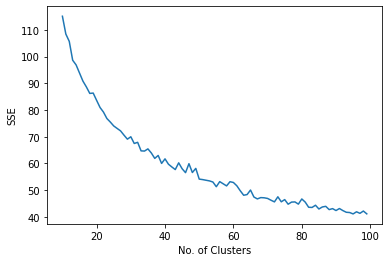

In [10]:
# Perform K-Means clustering for 
# varying number of clusters

errors = []

for i in range(10, 100):
    clusters, loss = cluster("mean", plot = 0, k = i)
    errors.append(loss)

# Visualise reduction of 
# SSE over cluster size 
plt.plot(range(10, 100), errors)
plt.xlabel("No. of Clusters")
plt.ylabel("SSE")

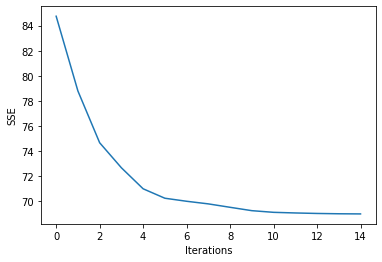

In [11]:
# Approximate bend at 30
# Perform clustering with 30 clusters
clusters, loss = cluster("mean", plot = 1, k = 30)

# K-Medoids

Text(0, 0.5, 'SSE')

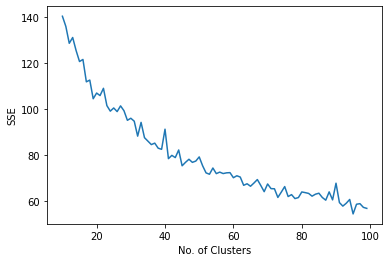

In [12]:
# Perform K-Medoid clustering for 
# varying number of clusters

errors = []
for i in range(10, 100):
    clusters, loss = cluster("medoid", plot = 0, k = i)
    errors.append(loss)

# Visualise reduction of 
# SSE over cluster size 
plt.plot(range(10, 100), errors)
plt.xlabel("No. of Clusters")
plt.ylabel("SSE")

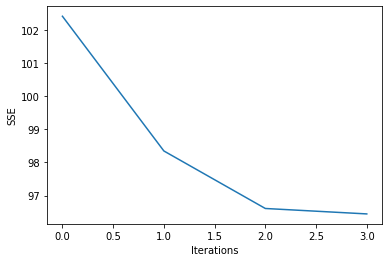

In [13]:
# Approximate bend at 25
# Perform clustering with 25 clusters
clusters, loss = cluster("medoid", plot = 1, k = 25)

# Hierarichal Agglomerative Clustering

In [14]:
# Define Datapoint class
# Enable Linking (Linked list is cluster)
class point:
    def __init__(self, index):
        self.index = index
        self.parent = None
        self.next = None
    
    # Function to link 
    # two data points
    def link(self, new_point):
        parent = self
        
        # End of cluster (End Of linked list)
        while(parent.next != None):
            parent = parent.next
            
        # Start of cluster (Head Of linked list)
        while(new_point.parent != None):
            new_point = new_point.parent
            
        # Linking
        parent.next = new_point
        new_point.parent = parent

In [15]:
# Function to merge points
# In proximity matrix

def merge(x, y, prox_matrix):
    for i in range(len(prox_matrix[x])):
        prox_matrix[i][x] = min(prox_matrix[i][x], prox_matrix[i][y])
        prox_matrix[i][y] = np.inf
        prox_matrix[x][i] = min(prox_matrix[x][i], prox_matrix[y][i])
        prox_matrix[y][i] = np.inf
        
    prox_matrix[x][x] = np.inf

In [16]:
# HAC Algorithm
def HAC(cutoff):
    # Initialise all clusters (Initaially, All points)
    points = [point(i) for i in range(len(data))]
    
    # Calculate Proximity Matrix
    prox_matrix = np.zeros((len(data), len(data)))
    for i in range(len(data)):
        prox_matrix[i] = np.linalg.norm(data[i].T - data, axis = 1, ord = 2)
    prox_matrix[prox_matrix == 0] = np.inf
    
    # Loop until all points are merged
    while(not np.all(prox_matrix == np.inf)):
        # Coordinates of least distance
        merge_indices = np.argwhere(prox_matrix == np.min(prox_matrix))[0]
        
        # Cutoff at a threshold
        if(np.min(prox_matrix) >= cutoff):
            break
        
        # Merge the points
        points[merge_indices[0]].link(points[merge_indices[1]])
        merge(merge_indices[0], merge_indices[1], prox_matrix)
    
    # Calculate the final number of points
    cluster_number = 0
    for i in range(len(points)):
        if(points[i].parent == None):
            cluster_number += 1

    return(points, cluster_number)

Text(0, 0.5, 'No. of Clusters')

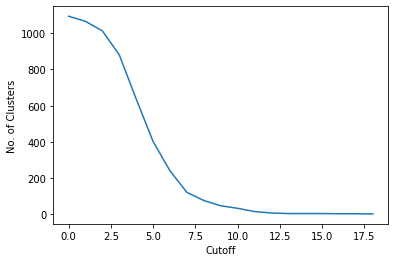

In [17]:
# Perform clustering for 
# varying cutoff points

cluster_numbers = []
for cutoff in range(1, 20):
    grouped_points, cluster_number = HAC(cutoff)
    cluster_numbers.append(cluster_number)

# We can see the reduction in number of clusters 
# with increasing cutoff distances
plt.plot(cluster_numbers)
plt.xlabel("Cutoff")
plt.ylabel("No. of Clusters")

In [18]:
# To print indexes of 
# points from one cluster
# point_ = grouped_points[1]
# i = 1
# while(point_.next != None):
#     print(point_.index, i)
#     point_ = point_.next
#     i += 1